# Download Sentinel 5P-L2 data

In [ ]:
import os
os.environ["SH_CLIENT_ID"] =  ""
os.environ["SH_CLIENT_SECRET"] = ""

In [2]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

import xarray as xr

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,12

In [6]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

/home/conda/deepesdl/2bd34cd8bababdd70844979892c66d897e94b4aa242ac37093e1ea8dfa679424-20240410-100719-847956-424-xcube-1.5.1/lib/python3.11/site-packages/xcube/util/plugin.py:182: UserWarning: Initializing xcube plugin 'xcube_cmems' took 140 ms, consider code optimization. (For example, avoid eager import of packages, consider lazy loading of resources, etc.)
  warnings.warn(


<IPython.core.display.JSON object>

In [7]:
get_data_store_params_schema('sentinelhub')

In [8]:
store = new_data_store('sentinelhub', api_url='https://creodias.sentinel-hub.com', num_retries=400, client_id ="f2c49c96-d830-4fd3-bf5a-59337ec04091", client_secret="Ff1Oi81jV8bcuf77uWxhILoXYCx2Ej7Q")


In [9]:
list(store.get_data_ids())

['S2L1C', 'S3OLCI', 'S3SLSTR', 'S1GRD', 'S2L2A', 'S5PL2']

In [11]:
store.describe_data('S5PL2')

In [1]:
bbox=[68.137207,24.886436,84.836426,34.379713]
#bbox = [24.886436,68.137207,34.379713,84.836426]

In [2]:
spatial_value = (bbox[2]-bbox[0])/512
spatial_value

0.032615662109375

In [13]:
cube = store.open_data(
    'S5PL2',
    variable_names=['NO2', 'SO2', 'O3', 'CO', 'CH4', 'HCHO', 'AER_AI_340_380', 'AER_AI_354_388', 'CLOUD_FRACTION'],
    tile_size=[512, 512],
    bbox=bbox,
    spatial_res=(bbox[2]-bbox[0])/512,
    upsampling='BILINEAR',
    time_range=['2019-01-01', '2023-12-31'],
    time_period='5D'
)
cube

<xarray.Dataset> Size: 2GB
Dimensions:         (time: 366, lat: 291, lon: 512, bnds: 2)
Coordinates:
  * lat             (lat) float64 2kB 34.36 34.33 34.3 ... 24.97 24.94 24.9
  * lon             (lon) float64 4kB 68.15 68.19 68.22 ... 84.75 84.79 84.82
  * time            (time) datetime64[ns] 3kB 2019-01-03T12:00:00 ... 2024-01...
    time_bnds       (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(366, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    AER_AI_340_380  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    AER_AI_354_388  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CH4             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CLOUD_FRACTION  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CO              (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    HCHO            (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    NO2             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    O3              (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    SO2             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-05-02T13:00:01.155492
    time_coverage_start:       2019-01-01T00:00:00+00:00
    time_coverage_end:         2024-01-05T00:00:00+00:00
    time_coverage_duration:    P1830DT0H0M0S
    time_coverage_resolution:  P5DT0H0M0S
    geospatial_lon_min:        68.137207
    geospatial_lat_min:        24.886436
    geospatial_lon_max:        84.836426
    geospatial_lat_max:        34.37759367382812

In [14]:
cube.attrs['history'] = str(cube.attrs['history'])
cube

<xarray.Dataset> Size: 2GB
Dimensions:         (time: 366, lat: 291, lon: 512, bnds: 2)
Coordinates:
  * lat             (lat) float64 2kB 34.36 34.33 34.3 ... 24.97 24.94 24.9
  * lon             (lon) float64 4kB 68.15 68.19 68.22 ... 84.75 84.79 84.82
  * time            (time) datetime64[ns] 3kB 2019-01-03T12:00:00 ... 2024-01...
    time_bnds       (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(366, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    AER_AI_340_380  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    AER_AI_354_388  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CH4             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CLOUD_FRACTION  (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    CO              (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    HCHO            (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    NO2             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    O3              (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
    SO2             (time, lat, lon) float32 218MB dask.array<chunksize=(1, 291, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-05-02T13:00:01.155492
    time_coverage_start:       2019-01-01T00:00:00+00:00
    time_coverage_end:         2024-01-05T00:00:00+00:00
    time_coverage_duration:    P1830DT0H0M0S
    time_coverage_resolution:  P5DT0H0M0S
    geospatial_lon_min:        68.137207
    geospatial_lat_min:        24.886436
    geospatial_lon_max:        84.836426
    geospatial_lat_max:        34.37759367382812

In [15]:
cube.to_netcdf("S5PL2_5D.nc", engine = "netcdf4")

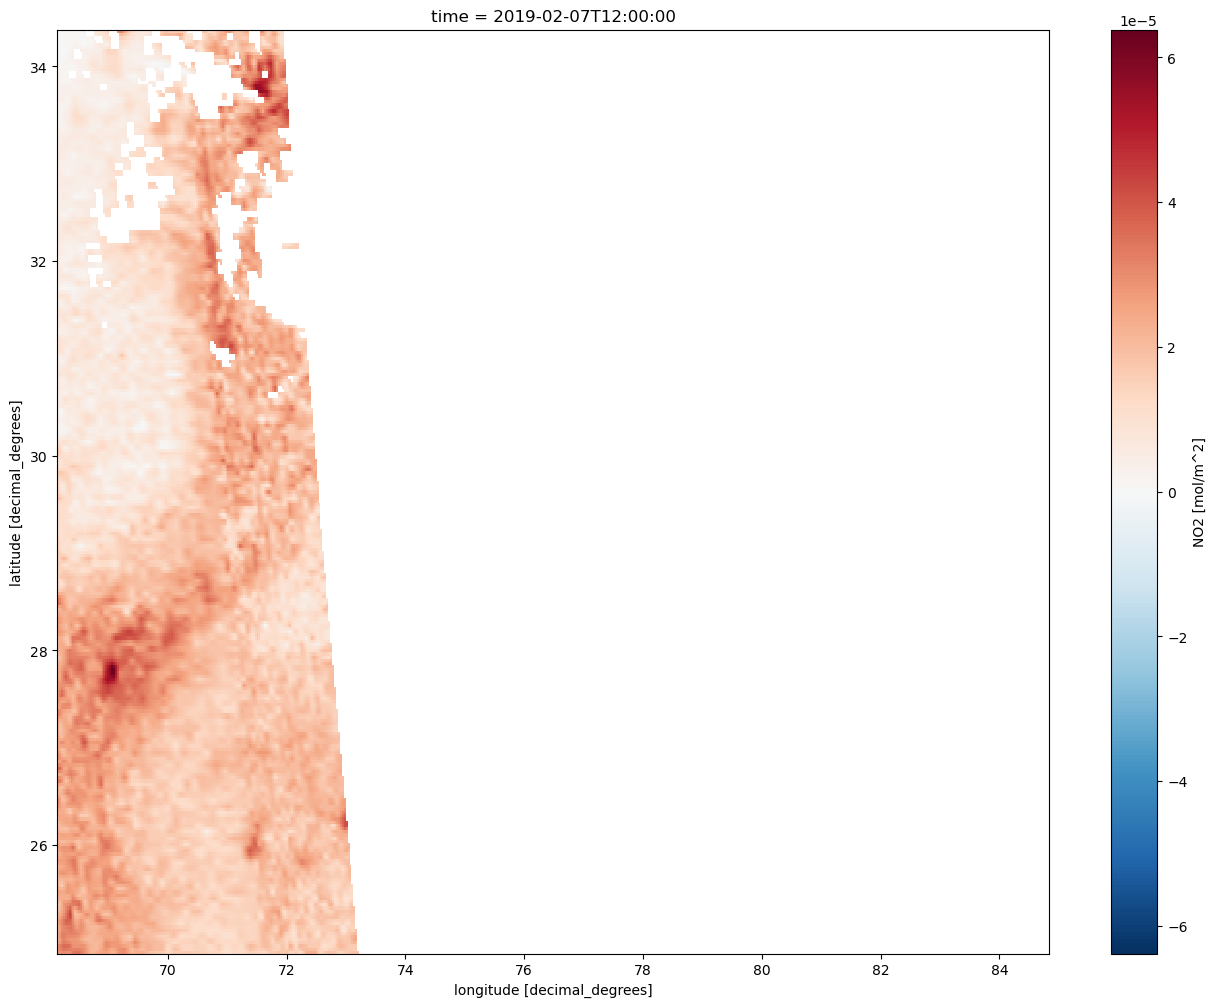

In [12]:
cube.NO2.isel(time=12).plot.imshow()

# Plot data

In [49]:
cube_test = xr.open_dataset("S5PL2_5D.nc")
cube_test

<xarray.Dataset> Size: 2GB
Dimensions:         (time: 366, lat: 291, lon: 512, bnds: 2)
Coordinates:
  * lat             (lat) float64 2kB 34.36 34.33 34.3 ... 24.97 24.94 24.9
  * lon             (lon) float64 4kB 68.15 68.19 68.22 ... 84.75 84.79 84.82
  * time            (time) datetime64[ns] 3kB 2019-01-03T12:00:00 ... 2024-01...
    time_bnds       (time, bnds) datetime64[ns] 6kB ...
Dimensions without coordinates: bnds
Data variables:
    AER_AI_340_380  (time, lat, lon) float32 218MB ...
    AER_AI_354_388  (time, lat, lon) float32 218MB ...
    CH4             (time, lat, lon) float32 218MB ...
    CLOUD_FRACTION  (time, lat, lon) float32 218MB ...
    CO              (time, lat, lon) float32 218MB ...
    HCHO            (time, lat, lon) float32 218MB ...
    NO2             (time, lat, lon) float32 218MB ...
    O3              (time, lat, lon) float32 218MB ...
    SO2             (time, lat, lon) float32 218MB ...
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-05-02T13:00:01.155492
    time_coverage_start:       2019-01-01T00:00:00+00:00
    time_coverage_end:         2024-01-05T00:00:00+00:00
    time_coverage_duration:    P1830DT0H0M0S
    time_coverage_resolution:  P5DT0H0M0S
    geospatial_lon_min:        68.137207
    geospatial_lat_min:        24.886436
    geospatial_lon_max:        84.836426
    geospatial_lat_max:        34.37759367382812

In [50]:
np.unique(cube_test['lat'])
#31.5204° N, 74.3587° E

array([24.90274383, 24.93535949, 24.96797516, 25.00059082, 25.03320648,
       25.06582214, 25.0984378 , 25.13105347, 25.16366913, 25.19628479,
       25.22890045, 25.26151611, 25.29413178, 25.32674744, 25.3593631 ,
       25.39197876, 25.42459442, 25.45721009, 25.48982575, 25.52244141,
       25.55505707, 25.58767274, 25.6202884 , 25.65290406, 25.68551972,
       25.71813538, 25.75075105, 25.78336671, 25.81598237, 25.84859803,
       25.88121369, 25.91382936, 25.94644502, 25.97906068, 26.01167634,
       26.044292  , 26.07690767, 26.10952333, 26.14213899, 26.17475465,
       26.20737032, 26.23998598, 26.27260164, 26.3052173 , 26.33783296,
       26.37044863, 26.40306429, 26.43567995, 26.46829561, 26.50091127,
       26.53352694, 26.5661426 , 26.59875826, 26.63137392, 26.66398958,
       26.69660525, 26.72922091, 26.76183657, 26.79445223, 26.8270679 ,
       26.85968356, 26.89229922, 26.92491488, 26.95753054, 26.99014621,
       27.02276187, 27.05537753, 27.08799319, 27.12060885, 27.15

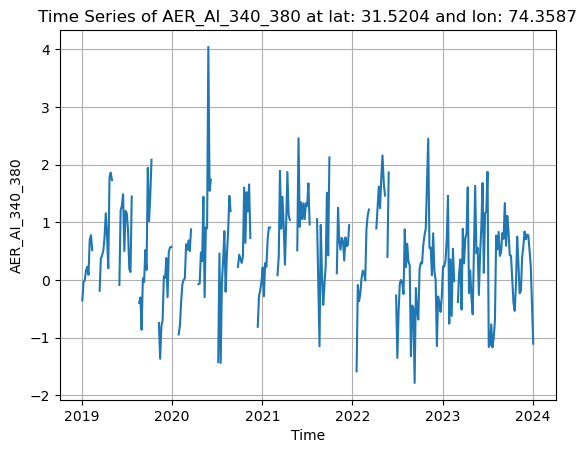

In [36]:
import xarray as xr
import matplotlib.pyplot as plt

# Step 2: Select the specific variable
# Replace 'variable_name' with the name of the variable you want to plot
variable = cube_test['AER_AI_340_380'].sel(lat=31.5204, lon=74.3587, method="nearest")

# Step 3: Plot the data
# Assuming the variable has a time dimension
variable.plot.line(x='time')

# Customize the plot (optional)
plt.title(f'Time Series of AER_AI_340_380 at lat: {lat} and lon: {lon}')
plt.xlabel('Time')
plt.ylabel('AER_AI_340_380')
plt.grid(True)

# Show the plot
plt.draw()
plt.savefig("plots/aer_ai_340.png", dpi = 300)
plt.show()


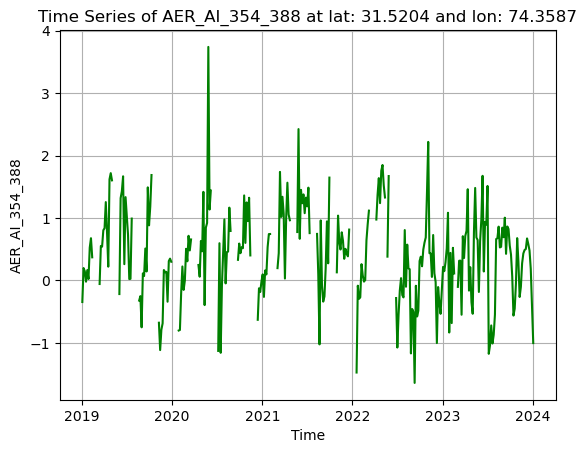

In [38]:
import xarray as xr
import matplotlib.pyplot as plt

# Step 2: Select the specific variable

lat= 31.5204
lon =74.3587

# Replace 'variable_name' with the name of the variable you want to plot
variable = cube_test['AER_AI_354_388'].sel(lat=31.5204, lon=74.3587, method="nearest")

# Step 3: Plot the data
# Assuming the variable has a time dimension
variable.plot.line(x='time', color="green")

# Customize the plot (optional)
plt.title(f'Time Series of AER_AI_354_388 at lat: {lat} and lon: {lon}')
plt.xlabel('Time')
plt.ylabel('AER_AI_354_388')
plt.grid(True)

# Show the plot
# Show the plot
plt.draw()
plt.savefig("plots/aer_ai_354.png", dpi = 300)
plt.show()


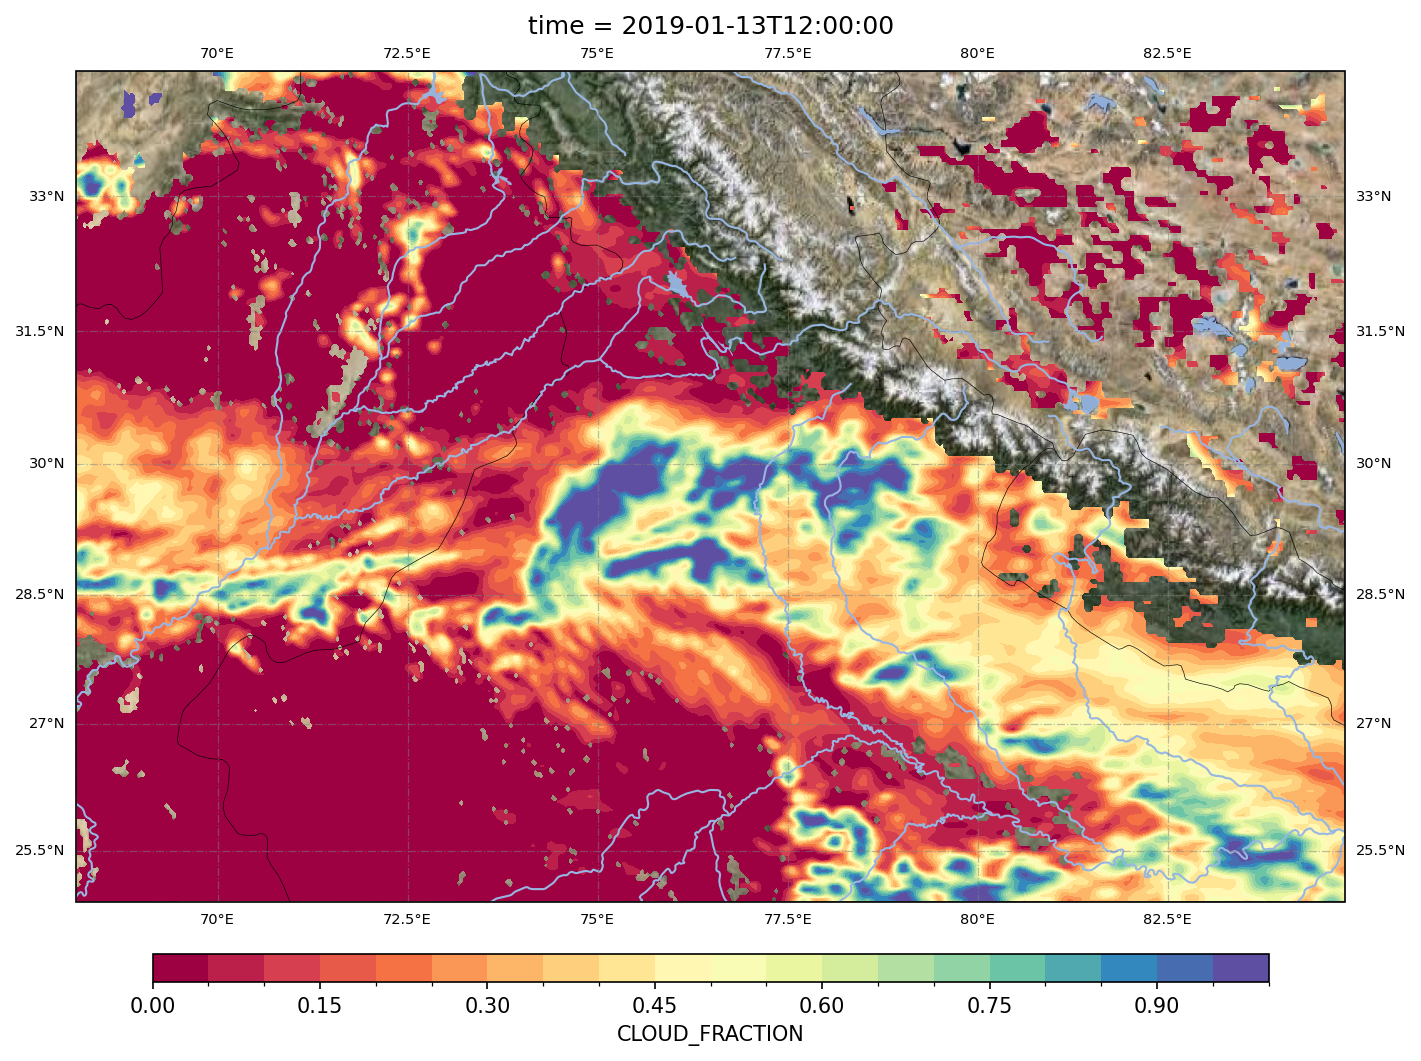

In [51]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import GoogleTiles
import cartopy.feature as cf

def plot_dataset(dataset : xr.Dataset):
    # First we specify Coordinate Refference System for Map Projection
    # We will use Mercator, which is a cylindrical, conformal projection. 
    # It has bery large distortion at high latitudes, cannot 
    # fully reach the polar regions.
    
    tiler = GoogleTiles(style="satellite")
    mercator = tiler.crs
    projection = ccrs.Mercator()
    # Specify CRS, that will be used to tell the code, where should our data be plotted
    crs = ccrs.PlateCarree()
    # Now we will create axes object having specific projection 
    plt.figure(figsize=(16,9), dpi=150)
    ax = plt.axes(projection=mercator, frameon=True)
    # Draw gridlines in degrees over Mercator map
    gl = ax.gridlines(crs=crs, draw_labels=True,
                    linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}
    # To plot borders and coastlines, we can use cartopy feature
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
    ax.add_feature(cf.LAKES, alpha=0.95)
    ax.add_feature(cf.RIVERS)
   
    
    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    # However, we can specify them in any crs that we want, but we need to provide appropriate
    # crs argument in ax.set_extent
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    lon_min = cube_test.attrs["geospatial_lon_min"]
    lon_max = cube_test.attrs["geospatial_lon_max"]
    lat_min = cube_test.attrs["geospatial_lat_min"]
    lat_max = cube_test.attrs["geospatial_lat_max"]
   

    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'CLOUD_FRACTION'}
    dataset.CLOUD_FRACTION.isel(time=2).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21, cmap='Spectral'), 
    ################################
    
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
    ax.add_image(tiler, 6)
    #ax.add_image(stamen_terrain, 8)
    #ax.stock_img()
    #plt.title(f"NO2 anomaly over study")
    plt.draw()
    plt.savefig("plots/map_CLOUD_FRACTION.png", dpi = 300)
    plt.show()

plot_dataset(cube_test)